# **SVM**

We classify the Iris Dataset using the SVM. The notebook is divided into 2 parts:


1.   Considering the Petal Features
2.   Considering the Sepal Features



 **Importing the Libraries**

In [32]:
# importing the necesaary libraries
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [33]:
# importing the datset
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
# conversion to pandas dataframe

iris = pd.DataFrame(
    data = np.c_[iris['data'],iris['target']],
    columns = iris['feature_names']+['target']
    )

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [35]:
# adding the species class

species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


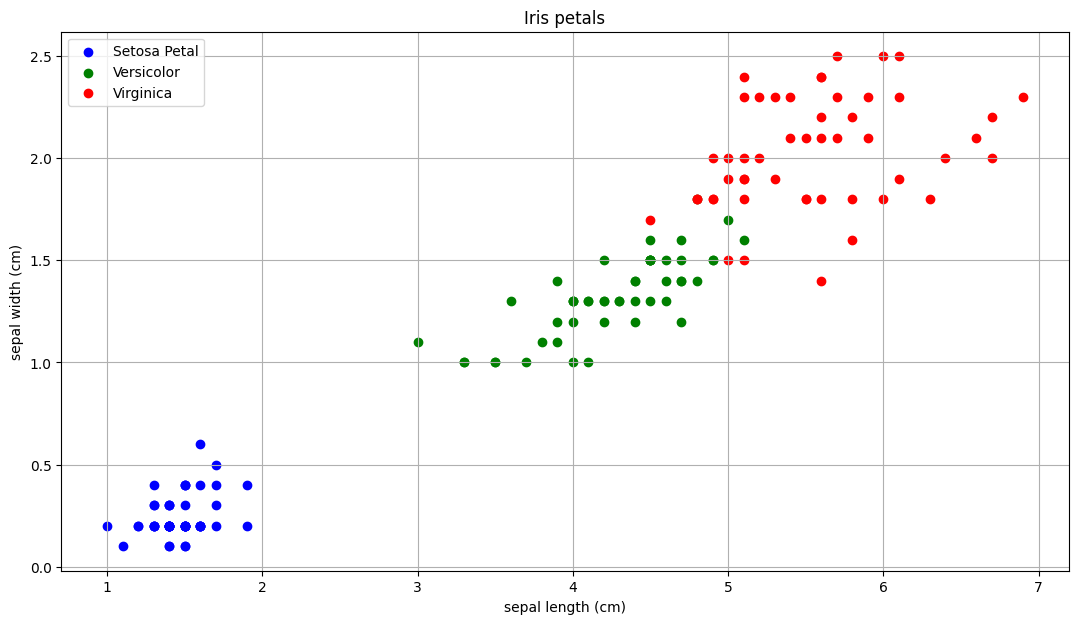

In [36]:
# plotting the dataset
import matplotlib.pyplot as plt

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa Petal", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

using petal features

In [37]:
# performing classification using svc
from sklearn.model_selection import train_test_split

X = iris.drop(['sepal length (cm)', 'sepal width (cm)', 'target', 'species'], axis=1)
y = iris.target

# defining the test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

In [38]:
# training and testing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C= 1.0
# defining the kernels and usinf them for predicting accuracy
# linear kernel
model_LINEAR = SVC(kernel="linear", C=C)
model_LINEAR.fit(X_train, y_train)
pred1= model_LINEAR.predict(X_test)
print("Accuracy using linear:", accuracy_score(pred1,y_test))

# RBF KERNEL
model_RBF = SVC(kernel="rbf", gamma=0.7, C=C)
model_RBF.fit(X_train, y_train)
pred2= model_RBF.predict(X_test)
print("Accuracy using rbf:", accuracy_score(pred2,y_test))

# POLYNOMIAL KERNEL
model_poly = SVC(kernel="poly", degree=3, gamma="auto", C=C)
model_poly.fit(X_train, y_train)
pred3= model_poly.predict(X_test)
print("Accuracy using poly:", accuracy_score(pred3,y_test))

#sigmoid kernel
model_sigmoid = SVC(kernel="sigmoid", gamma=0.7, C=C)
model_sigmoid.fit(X_train, y_train)
pred4= model_sigmoid.predict(X_test)
print("Accuracy using sigmoid:", accuracy_score(pred4,y_test))

Accuracy using linear: 0.9518072289156626
Accuracy using rbf: 0.9759036144578314
Accuracy using poly: 0.9879518072289156
Accuracy using sigmoid: 0.30120481927710846


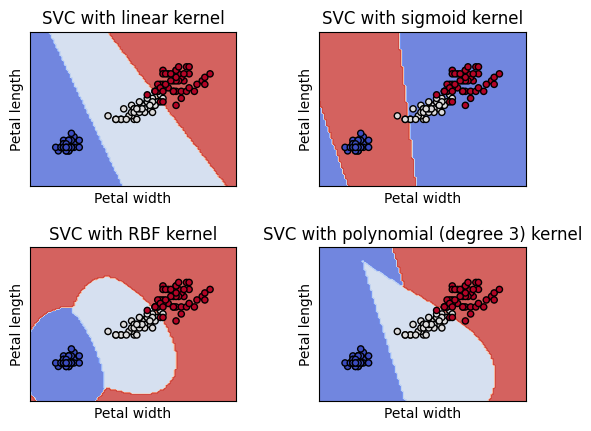

In [39]:
# decision boundary 
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()


X = iris.data[:, 2:]
y = iris.target


C = 1.0  
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel = "sigmoid"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)


titles = (
    "SVC with linear kernel",
    "SVC with sigmoid kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)


fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='Petal width',
        ylabel='Petal length',
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


**With sepal features**


In [40]:
# importing the datset
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
# conversion to pandas dataframe

iris = pd.DataFrame(
    data = np.c_[iris['data'],iris['target']],
    columns = iris['feature_names']+['target']
    )

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [42]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [43]:
# performing classification using svc
from sklearn.model_selection import train_test_split

X = iris.drop(['petal length (cm)', 'petal width (cm)', 'target', 'species'], axis=1)
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

In [44]:
# training and testing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Input the kernel from the user


C= 1.0
# linear kernel
model_LINEAR = SVC(kernel="linear", C=C)
model_LINEAR.fit(X_train, y_train)
pred1= model_LINEAR.predict(X_test)
print("Accuracy using linear:", accuracy_score(pred1,y_test))

# RBF KERNEL
model_RBF = SVC(kernel="rbf", gamma=0.7, C=C)
model_RBF.fit(X_train, y_train)
pred2= model_RBF.predict(X_test)
print("Accuracy using rbf:", accuracy_score(pred2,y_test))

# POLYNOMIAL KERNEL
model_poly = SVC(kernel="poly", degree=3, gamma="auto", C=C)
model_poly.fit(X_train, y_train)
pred3= model_poly.predict(X_test)
print("Accuracy using poly:", accuracy_score(pred3,y_test))

#sigmoid kernel
model_sigmoid = SVC(kernel="sigmoid", gamma=0.7, C=C)
model_sigmoid.fit(X_train, y_train)
pred4= model_sigmoid.predict(X_test)
print("Accuracy using sigmoid:", accuracy_score(pred4,y_test))

Accuracy using linear: 0.7710843373493976
Accuracy using rbf: 0.7710843373493976
Accuracy using poly: 0.7710843373493976
Accuracy using sigmoid: 0.30120481927710846


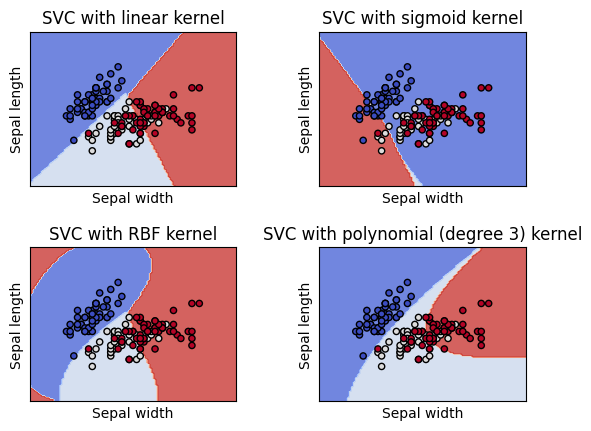

In [45]:
# decision boundary 
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()


X = iris.data[:, :2]
y = iris.target


C = 1.0  
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel = "sigmoid"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)


titles = (
    "SVC with linear kernel",
    "SVC with sigmoid kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)


fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='Sepal width',
        ylabel='Sepal length',
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
